# Components

gdsfactory provides some generic parametric cells in `gf.components` that you can customize for your application.

## Basic shapes

### Rectangle

To create a simple rectangle, there are two functions:

``gf.components.rectangle()`` can create a basic rectangle:

2023-01-22 16:10:41.813 | INFO     | gdsfactory.config:<module>:50 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 6.23.4


2023-01-22 16:10:42.647 | INFO     | gdsfactory.technology.layer_views:__init__:779 - Importing LayerViews from KLayout layer properties file: /home/runner/work/gdsfactory/gdsfactory/gdsfactory/generic_tech/klayout/tech/layers.lyp.


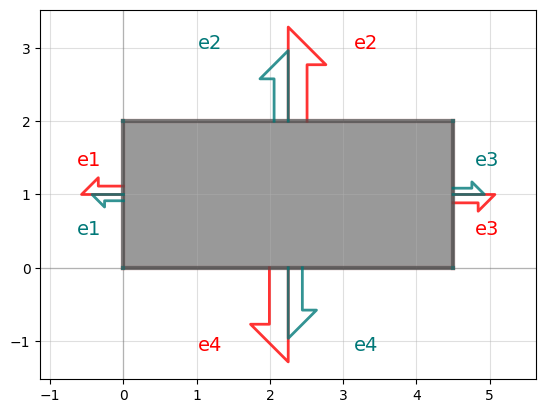

rectangle_layer1__0_size4p5__2: uid 033f6d77, ports ['e1', 'e2', 'e3', 'e4'], references ['compass_1'], 0 polygons

In [1]:
import gdsfactory as gf

r1 = gf.components.rectangle(size=(4.5, 2), layer=(1, 0))
r1

``gf.components.bbox()`` can also create a rectangle based on a bounding box.
This is useful if you want to create a rectangle which exactly surrounds a piece of existing geometry.
For example, if we have an arc geometry and we want to define a box around it, we can use ``gf.components.bbox()``:

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1522: UserWarning: Component 'Unnamed_acc6f0be' contains 1 Unnamed cells
  warnings.warn(


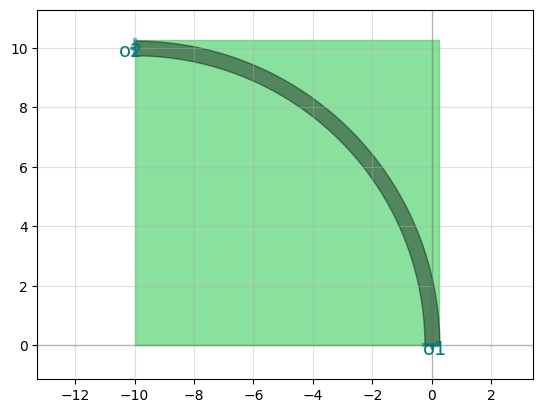

Unnamed_acc6f0be: uid acc6f0be, ports [], references ['bend_circular_1', 'bbox_1'], 0 polygons

In [2]:
c = gf.Component()
arc = c << gf.components.bend_circular(radius=10, width=0.5, angle=90, layer=(1, 0))
arc.rotate(90)
# Draw a rectangle around the arc we created by using the arc's bounding box
rect = c << gf.components.bbox(bbox=arc.bbox, layer=(0, 0))
c

### Cross

The ``gf.components.cross()`` function creates a cross structure:

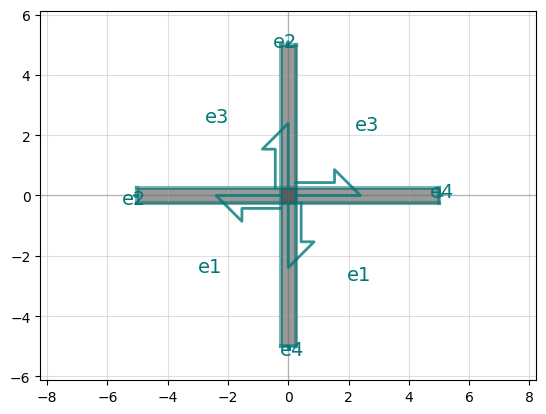

cross_6c558a55: uid fc50b2e1, ports [], references ['rectangle_1', 'rectangle_2'], 0 polygons

In [3]:
gf.components.cross(length=10, width=0.5, layer=(1, 0))

### Ellipse

The ``gf.components.ellipse()`` function creates an ellipse by defining the major and minor radii:

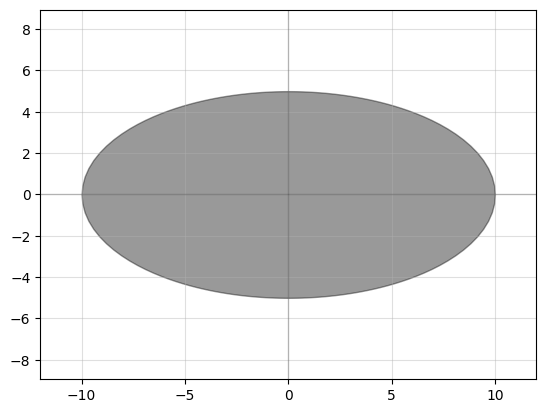

ellipse_layer1__0_radii10__5: uid d05471d5, ports [], references [], 1 polygons

In [4]:
gf.components.ellipse(radii=(10, 5), angle_resolution=2.5, layer=(1, 0))

### Circle

The ``gf.components.circle()`` function creates a circle:

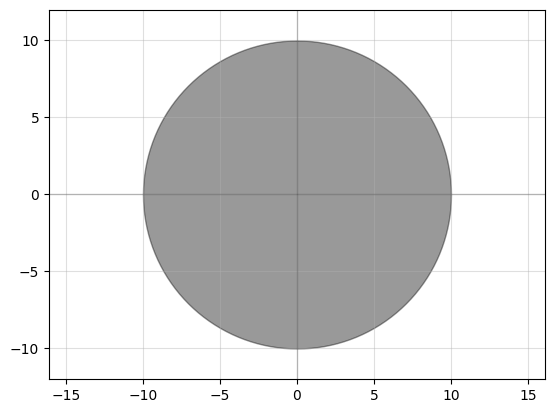

circle_layer1__0_radius10: uid d288397a, ports [], references [], 1 polygons

In [5]:
gf.components.circle(radius=10, angle_resolution=2.5, layer=(1, 0))

### Ring

The ``gf.components.ring()`` function creates a ring.  The radius refers to the center radius of the ring structure (halfway between the inner and outer radius).

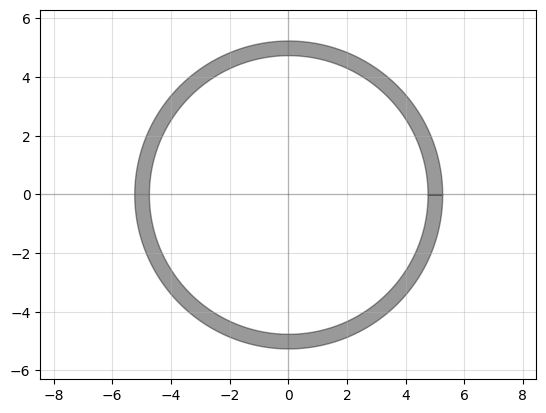

ring_layer1__0_radius5: uid 426d3d9d, ports [], references [], 1 polygons

In [6]:
gf.components.ring(radius=5, width=0.5, angle_resolution=2.5, layer=(1, 0))

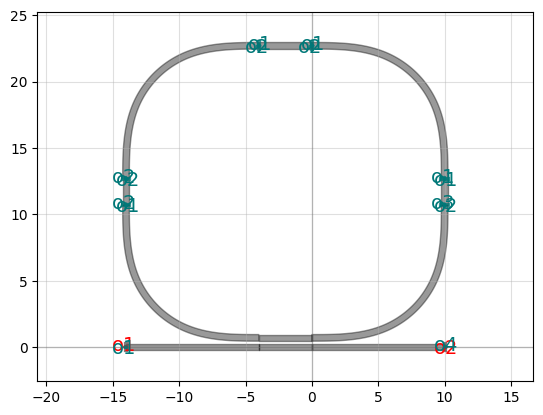

ring_single_f77f5fc4: uid 8c938a29, ports ['o2', 'o1'], references ['coupler_ring_1', 'straight_1', 'straight_2', 'bend_euler_1', 'bend_euler_2', 'straight_3'], 0 polygons

In [7]:
gf.components.ring_single(
    width=0.5, gap=0.2, radius=10, length_x=4, length_y=2, layer=(1, 0)
)

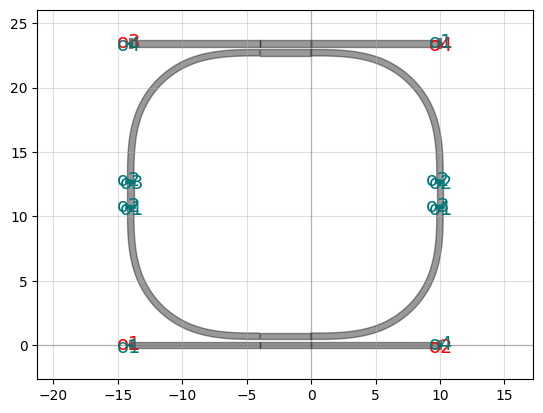

ring_double_f77f5fc4: uid 30f8aafb, ports ['o1', 'o2', 'o3', 'o4'], references ['coupler_ring_1', 'coupler_ring_2', 'straight_1', 'straight_2'], 0 polygons

In [8]:
import gdsfactory as gf

gf.components.ring_double(
    width=0.5, gap=0.2, radius=10, length_x=4, length_y=2, layer=(1, 0)
)

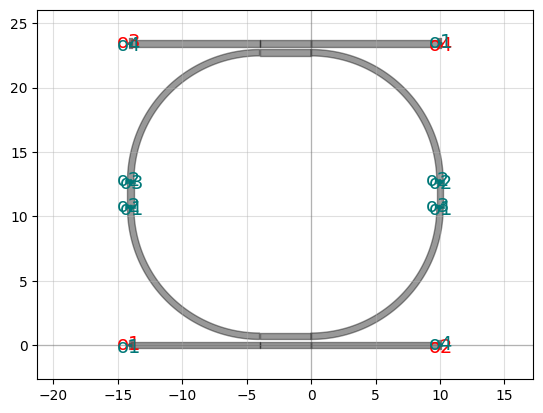

ring_double_72b012ff: uid 379a27ba, ports ['o1', 'o2', 'o3', 'o4'], references ['coupler_ring_1', 'coupler_ring_2', 'straight_1', 'straight_2'], 0 polygons

In [9]:
gf.components.ring_double(
    width=0.5,
    gap=0.2,
    radius=10,
    length_x=4,
    length_y=2,
    layer=(1, 0),
    bend=gf.components.bend_circular,
)

### Bend circular

The ``gf.components.bend_circular()`` function creates an arc.  The radius refers to the center radius of the arc (halfway between the inner and outer radius).

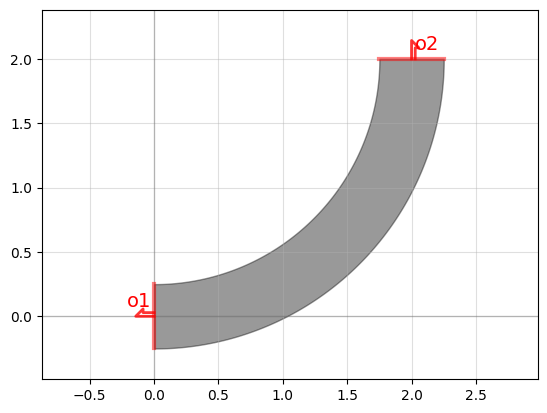

bend_circular_0f75605b: uid 18774b16, ports ['o1', 'o2'], references [], 1 polygons

In [10]:
gf.components.bend_circular(radius=2.0, width=0.5, angle=90, npoints=720, layer=(1, 0))

### Bend euler

The ``gf.components.bend_euler()`` function creates an adiabatic bend in which the bend radius changes gradually. Euler bends have lower loss than circular bends.


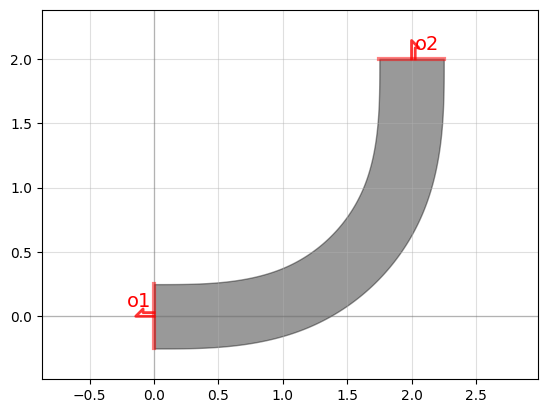

bend_euler_0f75605b: uid e9be55f7, ports ['o1', 'o2'], references [], 1 polygons

In [11]:
gf.components.bend_euler(radius=2.0, width=0.5, angle=90, npoints=720, layer=(1, 0))

### Tapers

`gf.components.taper()`is defined by setting its length and its start and end length.  It has two ports, ``1`` and ``2``, on either end, allowing you to easily connect it to other structures.

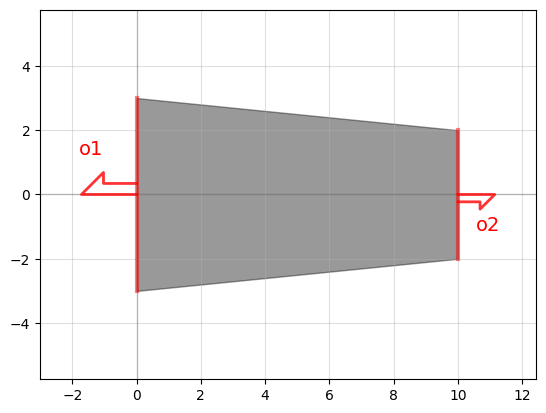

taper_e741c711: uid c61c10e2, ports ['o1', 'o2'], references [], 1 polygons

In [12]:
gf.components.taper(length=10, width1=6, width2=4, port=None, layer=(1, 0))

`gf.components.ramp()` is a structure is similar to `taper()` except it is asymmetric.  It also has two ports, ``1`` and ``2``, on either end.

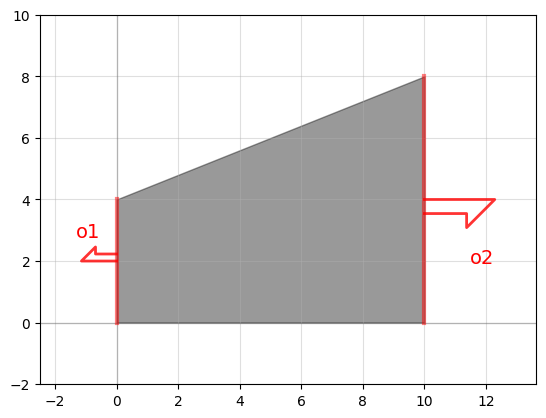

ramp_40a909be: uid ae3758c4, ports ['o1', 'o2'], references [], 1 polygons

In [13]:
gf.components.ramp(length=10, width1=4, width2=8, layer=(1, 0))

### Common compound shapes

The `gf.components.L()` function creates a "L" shape with ports on either end named ``1`` and ``2``.

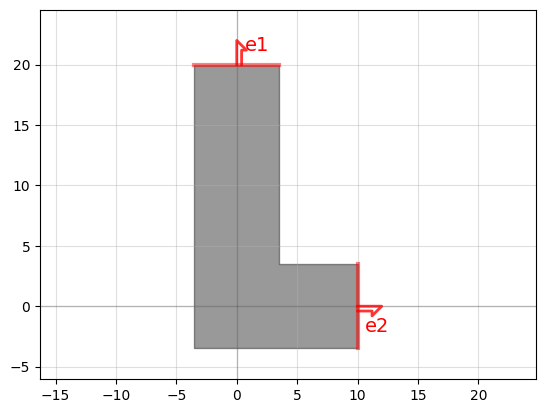

L_layer1__0_width7: uid eaa03082, ports ['e1', 'e2'], references [], 1 polygons

In [14]:
gf.components.L(width=7, size=(10, 20), layer=(1, 0))

The `gf.components.C()` function creates a "C" shape with ports on either end named ``1`` and ``2``.

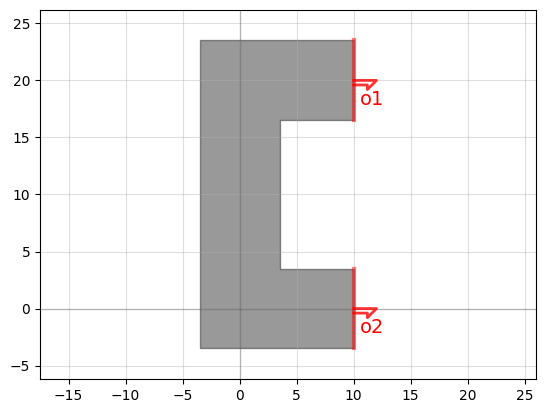

C_b95f8aee: uid 36481eb6, ports ['o1', 'o2'], references [], 1 polygons

In [15]:
gf.components.C(width=7, size=(10, 20), layer=(1, 0))

## Text

Gdsfactory has an implementation of the DEPLOF font with the majority of english ASCII characters represented (thanks to phidl)

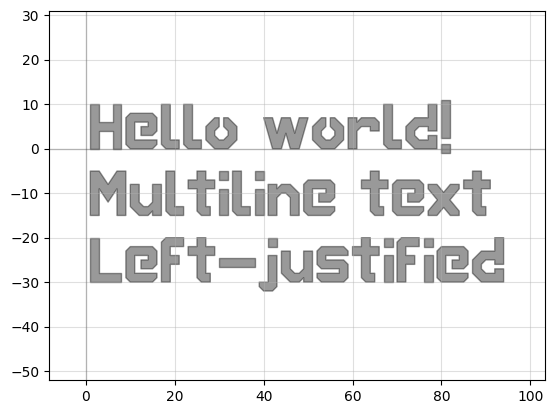

text_c4bef3d3: uid 11853cff, ports [], references [], 44 polygons

In [16]:
gf.components.text(
    text="Hello world!\nMultiline text\nLeft-justified",
    size=10,
    justify="left",
    layer=(1, 0),
)
# `justify` should be either 'left', 'center', or 'right'

## Grid / packer / align / distribute

### Grid


The ``gf.components.grid()`` function can take a list (or 2D array) of objects and arrange them along a grid. This is often useful for making parameter sweeps.   If the `separation` argument is true, grid is arranged such that the elements are guaranteed not to touch, with a `spacing` distance between them.  If `separation` is false, elements are spaced evenly along a grid. The `align_x`/`align_y` arguments specify intra-row/intra-column alignment.  The`edge_x`/`edge_y` arguments specify inter-row/inter-column alignment (unused if `separation = True`).

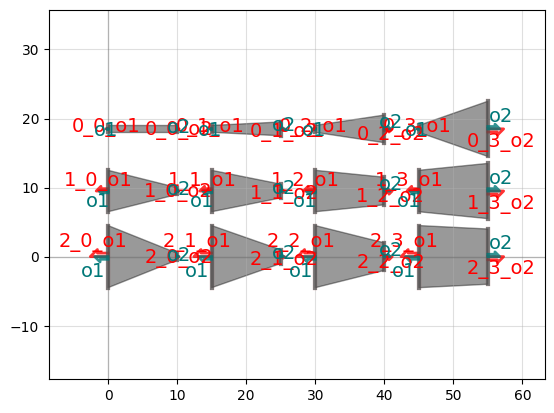

grid_80f8859b: uid c8878fa1, ports ['0_0_o1', '0_0_o2', '0_1_o1', '0_1_o2', '0_2_o1', '0_2_o2', '0_3_o1', '0_3_o2', '1_0_o1', '1_0_o2', '1_1_o1', '1_1_o2', '1_2_o1', '1_2_o2', '1_3_o1', '1_3_o2', '2_0_o1', '2_0_o2', '2_1_o1', '2_1_o2', '2_2_o1', '2_2_o2', '2_3_o1', '2_3_o2'], references ['0_0', '0_1', '0_2', '0_3', '1_0', '1_1', '1_2', '1_3', '2_0', '2_1', '2_2', '2_3'], 0 polygons

In [17]:
import gdsfactory as gf

components_list = []
for width1 in [1, 6, 9]:
    for width2 in [1, 2, 4, 8]:
        D = gf.components.taper(length=10, width1=width1, width2=width2, layer=(1, 0))
        components_list.append(D)

c = gf.grid(
    components_list,
    spacing=(5, 1),
    separation=True,
    shape=(3, 4),
    align_x="x",
    align_y="y",
    edge_x="x",
    edge_y="ymax",
)
c

### Pack


The ``gf.pack()`` function packs geometries together into rectangular bins. If a ``max_size`` is specified, the function will create as many bins as is necessary to pack all the geometries and then return a list of the filled-bin Components.

Here we generate several random shapes then pack them together automatically. We allow the bin to be as large as needed to fit all the Components by specifying ``max_size = (None, None)``.  By setting ``aspect_ratio = (2,1)``, we specify the rectangular bin it tries to pack them into should be twice as wide as it is tall:

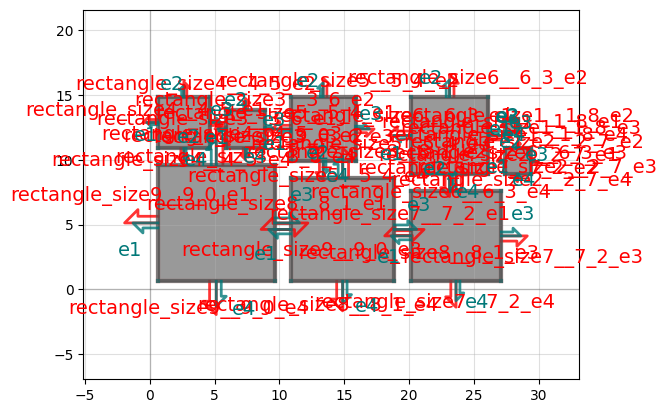

pack_0_219473ad: uid 219473ad, ports ['rectangle_size9__9_0_e1', 'rectangle_size9__9_0_e2', 'rectangle_size9__9_0_e3', 'rectangle_size9__9_0_e4', 'rectangle_size8__8_1_e1', 'rectangle_size8__8_1_e2', 'rectangle_size8__8_1_e3', 'rectangle_size8__8_1_e4', 'rectangle_size7__7_2_e1', 'rectangle_size7__7_2_e2', 'rectangle_size7__7_2_e3', 'rectangle_size7__7_2_e4', 'rectangle_size6__6_3_e1', 'rectangle_size6__6_3_e2', 'rectangle_size6__6_3_e3', 'rectangle_size6__6_3_e4', 'rectangle_size5__5_4_e1', 'rectangle_size5__5_4_e2', 'rectangle_size5__5_4_e3', 'rectangle_size5__5_4_e4', 'rectangle_size4__4_5_e1', 'rectangle_size4__4_5_e2', 'rectangle_size4__4_5_e3', 'rectangle_size4__4_5_e4', 'rectangle_size3__3_6_e1', 'rectangle_size3__3_6_e2', 'rectangle_size3__3_6_e3', 'rectangle_size3__3_6_e4', 'rectangle_size2__2_7_e1', 'rectangle_size2__2_7_e2', 'rectangle_size2__2_7_e3', 'rectangle_size2__2_7_e4', 'rectangle_size1__1_8_e1', 'rectangle_size1__1_8_e2', 'rectangle_size1__1_8_e3', 'rectangle_size1__1_8_e4'], references ['rectangle_1', 'rectangle_2', 'rectangle_3', 'rectangle_4', 'rectangle_5', 'rectangle_6', 'rectangle_7', 'rectangle_8', 'rectangle_9'], 0 polygons

In [18]:
import numpy as np
import gdsfactory as gf

np.random.seed(5)
D_list = [gf.components.rectangle(size=(i, i)) for i in range(1, 10)]

D_packed_list = gf.pack(
    D_list,  # Must be a list or tuple of Components
    spacing=1.25,  # Minimum distance between adjacent shapes
    aspect_ratio=(2, 1),  # (width, height) ratio of the rectangular bin
    max_size=(None, None),  # Limits the size into which the shapes will be packed
    density=1.05,  # Values closer to 1 pack tighter but require more computation
    sort_by_area=True,  # Pre-sorts the shapes by area
)
D = D_packed_list[0]  # Only one bin was created, so we plot that
D

Say we need to pack many shapes into multiple 500x500 unit die. If we set ``max_size = (500,500)`` the shapes will be packed into as many 500x500 unit die as required to fit them all:

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/pack.py:219: UserWarning: unable to pack in one component, creating 4 components
  warnings.warn(f"unable to pack in one component, creating {groups} components")


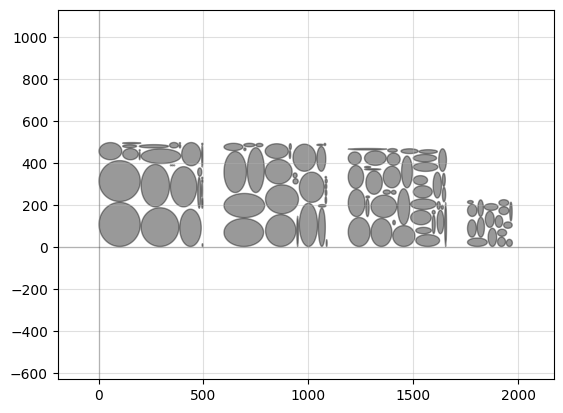

packed: uid 1f017b2b, ports [], references ['pack_0_be86367c_1', 'pack_1_03eb9560_1', 'pack_2_57c6db2f_1', 'pack_3_6b9d2f41_1'], 0 polygons

In [19]:
np.random.seed(1)
D_list = [
    gf.components.ellipse(radii=tuple(np.random.rand(2) * n + 2)) for n in range(120)
]
D_packed_list = gf.pack(
    D_list,  # Must be a list or tuple of Components
    spacing=4,  # Minimum distance between adjacent shapes
    aspect_ratio=(1, 1),  # Shape of the box
    max_size=(500, 500),  # Limits the size into which the shapes will be packed
    density=1.05,  # Values closer to 1 pack tighter but require more computation
    sort_by_area=True,  # Pre-sorts the shapes by area
)

# Put all packed bins into a single device and spread them out with distribute()
F = gf.Component("packed")
[F.add_ref(D) for D in D_packed_list]
F.distribute(elements="all", direction="x", spacing=100, separation=True)
F

Note that the packing problem is an NP-complete problem, so ``gf.components.packer()`` may be slow if there are more than a few hundred Components to pack (in that case, try pre-packing a few dozen at a time then packing the resulting bins). Requires the ``rectpack`` python package.

### Distribute


The ``distribute()`` function allows you to space out elements within a Component evenly in the x or y direction.  It is meant to duplicate the distribute functionality present in Inkscape / Adobe Illustrator:

![](images/inkscape_distribute.png)

Say we start out with a few random-sized rectangles we want to space out:

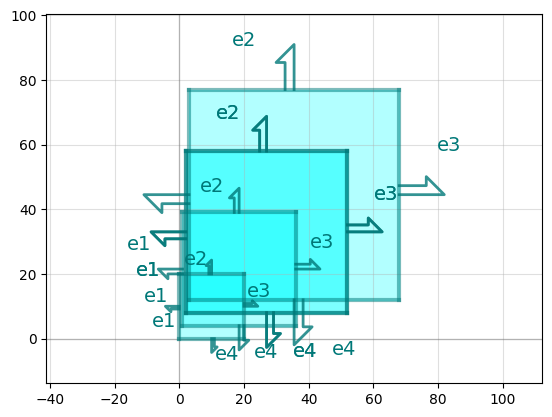

rectangles: uid 18b57a64, ports [], references ['rectangle_1', 'rectangle_2', 'rectangle_3', 'rectangle_4', 'rectangle_5'], 0 polygons

In [20]:
c = gf.Component("rectangles")
# Create different-sized rectangles and add them to D
[
    c.add_ref(
        gf.components.rectangle(size=[n * 15 + 20, n * 15 + 20], layer=(2, 0))
    ).move([n, n * 4])
    for n in [0, 2, 3, 1, 2]
]
c

Oftentimes, we want to guarantee some distance between the objects.  By setting ``separation = True`` we move each object such that there is ``spacing`` distance between them:

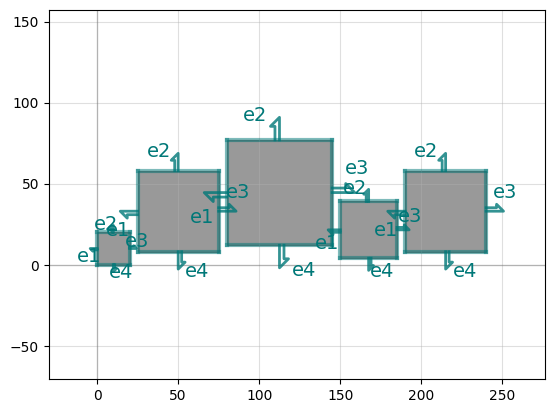

rectangles_separated: uid c0c2c32b, ports [], references ['rectangle_1', 'rectangle_2', 'rectangle_3', 'rectangle_4', 'rectangle_5'], 0 polygons

In [21]:
D = gf.Component("rectangles_separated")
# Create different-sized rectangles and add them to D
[
    D.add_ref(gf.components.rectangle(size=[n * 15 + 20, n * 15 + 20])).move((n, n * 4))
    for n in [0, 2, 3, 1, 2]
]
# Distribute all the rectangles in D along the x-direction with a separation of 5
D.distribute(
    elements="all",  # either 'all' or a list of objects
    direction="x",  # 'x' or 'y'
    spacing=5,
    separation=True,
)
D

Alternatively, we can spread them out on a fixed grid by setting ``separation = False``. Here we align the left edge (``edge = 'min'``) of each object along a grid spacing of 100:

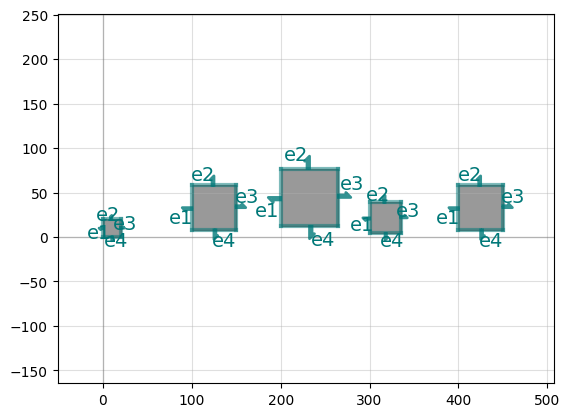

spacing100: uid 76d60209, ports [], references ['rectangle_1', 'rectangle_2', 'rectangle_3', 'rectangle_4', 'rectangle_5'], 0 polygons

In [22]:
D = gf.Component("spacing100")
[
    D.add_ref(gf.components.rectangle(size=[n * 15 + 20, n * 15 + 20])).move((n, n * 4))
    for n in [0, 2, 3, 1, 2]
]
D.distribute(
    elements="all", direction="x", spacing=100, separation=False, edge="xmin"
)  # edge must be either 'xmin' (left), 'xmax' (right), or 'x' (center)
D

The alignment can be done along the right edge as well by setting ``edge = 'max'``, or along the center by setting ``edge = 'center'`` like in the following:

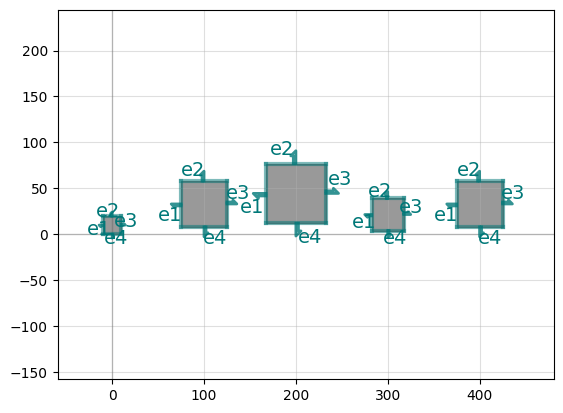

alignment: uid 24f08b40, ports [], references ['rectangle_1', 'rectangle_2', 'rectangle_3', 'rectangle_4', 'rectangle_5'], 0 polygons

In [23]:
D = gf.Component("alignment")
[
    D.add_ref(gf.components.rectangle(size=[n * 15 + 20, n * 15 + 20])).move(
        (n - 10, n * 4)
    )
    for n in [0, 2, 3, 1, 2]
]
D.distribute(
    elements="all", direction="x", spacing=100, separation=False, edge="x"
)  # edge must be either 'xmin' (left), 'xmax' (right), or 'x' (center)
D

### Align


The ``align()`` function allows you to elements within a Component horizontally or vertically.  It is meant to duplicate the alignment functionality present in Inkscape / Adobe Illustrator:

![](images/inkscape_align.png)

Say we ``distribute()`` a few objects, but they're all misaligned:

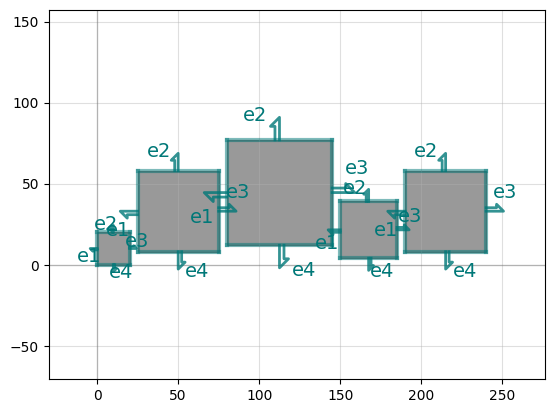

distribute: uid 5727ed63, ports [], references ['rectangle_1', 'rectangle_2', 'rectangle_3', 'rectangle_4', 'rectangle_5'], 0 polygons

In [24]:
D = gf.Component("distribute")
# Create different-sized rectangles and add them to D then distribute them
[
    D.add_ref(gf.components.rectangle(size=[n * 15 + 20, n * 15 + 20])).move((n, n * 4))
    for n in [0, 2, 3, 1, 2]
]
D.distribute(elements="all", direction="x", spacing=5, separation=True)
D

we can use the ``align()`` function to align their top edges (``alignment = 'ymax'):

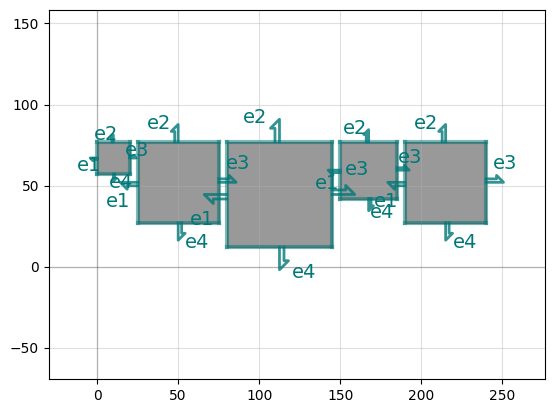

align: uid 218a1145, ports [], references ['rectangle_1', 'rectangle_2', 'rectangle_3', 'rectangle_4', 'rectangle_5'], 0 polygons

In [25]:
D = gf.Component("align")
# Create different-sized rectangles and add them to D then distribute them
[
    D.add_ref(gf.components.rectangle(size=[n * 15 + 20, n * 15 + 20])).move((n, n * 4))
    for n in [0, 2, 3, 1, 2]
]
D.distribute(elements="all", direction="x", spacing=5, separation=True)

# Align top edges
D.align(elements="all", alignment="ymax")
D

or align their centers (``alignment = 'y'):

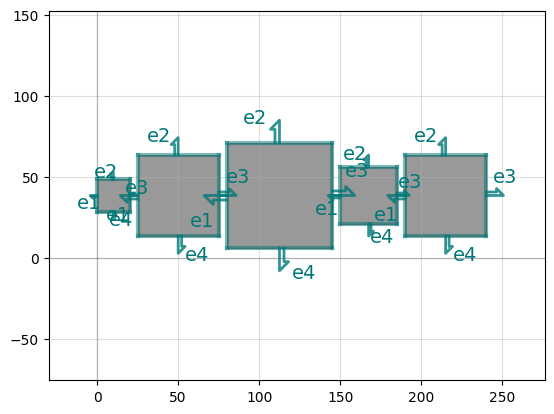

distribute_align_y: uid 54f6f35d, ports [], references ['rectangle_1', 'rectangle_2', 'rectangle_3', 'rectangle_4', 'rectangle_5'], 0 polygons

In [26]:
D = gf.Component("distribute_align_y")
# Create different-sized rectangles and add them to D then distribute them
[
    D.add_ref(gf.components.rectangle(size=[n * 15 + 20, n * 15 + 20])).move((n, n * 4))
    for n in [0, 2, 3, 1, 2]
]
D.distribute(elements="all", direction="x", spacing=5, separation=True)

# Align top edges
D.align(elements="all", alignment="y")
D

other valid alignment options include ``'xmin', 'x', 'xmax', 'ymin', 'y', and 'ymax'``

## Boolean / outline / offset / invert
There are several common boolean-type operations available in the geometry library.  These include typical boolean operations (and/or/not/xor), offsetting (expanding/shrinking polygons), outlining, and inverting.

### Boolean


The ``gf.geometry.boolean()`` function can perform AND/OR/NOT/XOR operations, and will return a new geometry with the result of that operation.

Speedup note: The ``num_divisions`` argument can be used to divide up the geometry into multiple rectangular regions and process each region sequentially (which is more computationally efficient).  If you have a large geometry that takes a long time to process, try using ``num_divisions = [10,10]`` to optimize the operation.

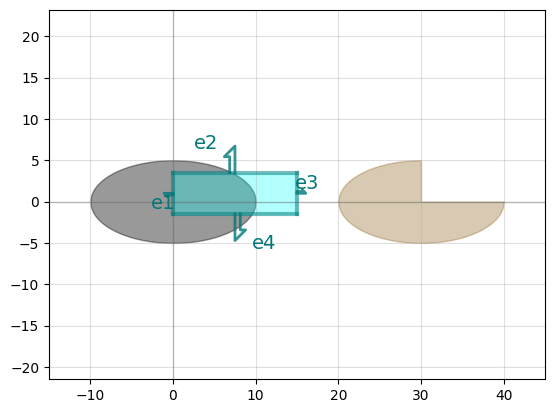

bool: uid a00e9e58, ports [], references ['ellipse_1', 'rectangle_1', 'boolean_1'], 0 polygons

In [27]:
import gdsfactory as gf

E = gf.components.ellipse(radii=(10, 5), layer=(1, 0))
R = gf.components.rectangle(size=[15, 5], layer=(2, 0))
C = gf.geometry.boolean(
    A=E, B=R, operation="not", precision=1e-6, num_divisions=[1, 1], layer=(3, 0)
)
# Other operations include 'and', 'or', 'xor', or equivalently 'A-B', 'B-A', 'A+B'

# Plot the originals and the result
D = gf.Component("bool")
D.add_ref(E)
D.add_ref(R).movey(-1.5)
D.add_ref(C).movex(30)
D

To learn how booleans work you can try all the different operations `not`, `and`, `or`, `xor`

In [28]:
import gdsfactory as gf

operation = "not"
operation = "and"
operation = "or"
operation = "xor"

r1 = (8, 8)
r2 = (11, 4)
r1 = (80, 80)
r2 = (110, 40)

angle_resolution = 0.1

c1 = gf.components.ellipse(radii=r1, layer=(1, 0), angle_resolution=angle_resolution)
c2 = gf.components.ellipse(radii=r2, layer=(1, 0), angle_resolution=angle_resolution)

2023-01-22 16:10:49.209 | INFO     | gdsfactory.component:_write_library:1538 - Wrote to '/tmp/tmpbva70pwm/gdsfactory/ellipse_4aa83906.gds'


2023-01-22 16:10:49.220 | INFO     | gdsfactory.component:_write_library:1538 - Wrote to '/tmp/tmpkf1g6tfx/gdsfactory/ellipse_cb56ffd1.gds'


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


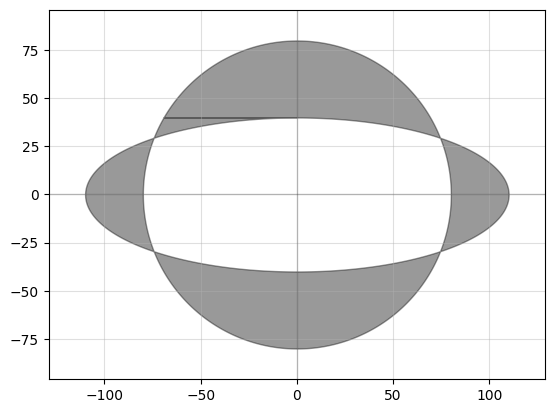

boolean_klayout_92e28f37: uid f6db3296, ports [], references [], 1 polygons

In [29]:
%time

c3 = gf.geometry.boolean_klayout(
    c1, c2, operation=operation, layer1=(1, 0), layer2=(1, 0), layer3=(1, 0)
)  # KLayout booleans
c3

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.72 µs


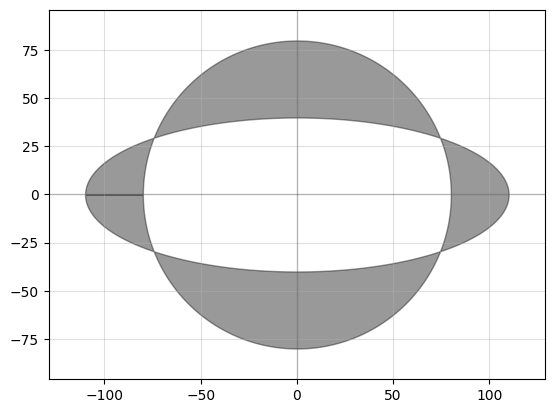

boolean_77564ca9: uid 52936258, ports [], references [], 1 polygons

In [30]:
%time
c4 = gf.geometry.boolean(c1, c2, operation=operation)
c4

### Offset

The ``offset()`` function takes the polygons of the input geometry, combines them together, and expands/contracts them.  The function returns polygons on a single layer -- it does not respect layers.

Speedup note: The ``num_divisions`` argument can be used to divide up the geometry into multiple rectangular regions and process each region sequentially (which is more computationally efficient).  If you have a large geometry that takes a long time to process, try using ``num_divisions = [10,10]`` to optimize the operation.

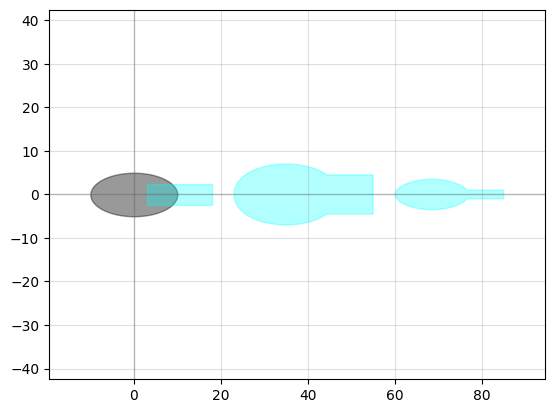

top: uid 21c0523a, ports [], references ['ellipse_and_rectangle_1', 'offset_1', 'offset_2'], 0 polygons

In [31]:
import gdsfactory as gf

# Create `T`, an ellipse and rectangle which will be offset (expanded / contracted)
T = gf.Component("ellipse_and_rectangle")
e = T << gf.components.ellipse(radii=(10, 5), layer=(1, 0))
r = T << gf.components.rectangle(size=[15, 5], layer=(2, 0))
r.move([3, -2.5])

Texpanded = gf.geometry.offset(T, distance=2, precision=1e-6, layer=(2, 0))
Texpanded.name = "expanded"
Tshrink = gf.geometry.offset(T, distance=-1.5, precision=1e-6, layer=(2, 0))
Tshrink.name = "shrink"

# Plot the original geometry, the expanded, and the shrunk versions
offsets = gf.Component("top")
t1 = offsets.add_ref(T)
t2 = offsets.add_ref(Texpanded)
t3 = offsets.add_ref(Tshrink)
offsets.distribute([t1, t2, t3], direction="x", spacing=5)
offsets

### Outline

The ``outline()`` function takes the polygons of the input geometry then performs an offset and "not" boolean operation to create an outline.  The function returns polygons on a single layer -- it does not respect layers.

Speedup note: The ``num_divisions`` argument can be used to divide up the geometry into multiple rectangular regions and process each region sequentially (which is more computationally efficient).  If you have a large geometry that takes a long time to process, try using ``num_divisions = [10,10]`` to optimize the operation.

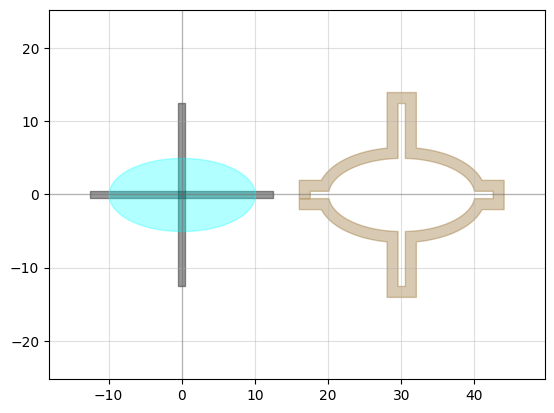

outline_compare: uid b9ed5f8f, ports [], references ['outline_demo_1', 'outline_1'], 0 polygons

In [32]:
import gdsfactory as gf

# Create a blank device and add two shapes
X = gf.Component("outline_demo")
X.add_ref(gf.components.cross(length=25, width=1, layer=(1, 0)))
X.add_ref(gf.components.ellipse(radii=[10, 5], layer=(2, 0)))

O = gf.geometry.outline(X, distance=1.5, precision=1e-6, layer=(3, 0))

# Plot the original geometry and the result
c = gf.Component("outline_compare")
c.add_ref(X)
c.add_ref(O).movex(30)
c

The ``open_ports`` argument opens holes in the outlined geometry at each Port location.

- If not False, holes will be cut in the outline such that the Ports are not covered.
- If True, the holes will have the same width as the Ports.
- If a float, the holes will be widened by that value.
- If a float equal to the outline ``distance``, the outline will be flush with the port (useful positive-tone processes).

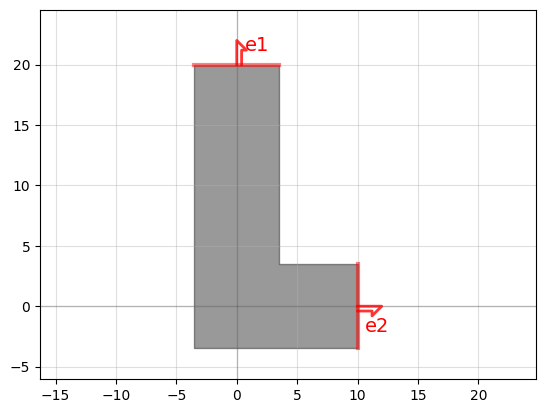

L_layer1__0_width7: uid eaa03082, ports ['e1', 'e2'], references [], 1 polygons

In [33]:
gf.components.L(width=7, size=(10, 20), layer=(1, 0))

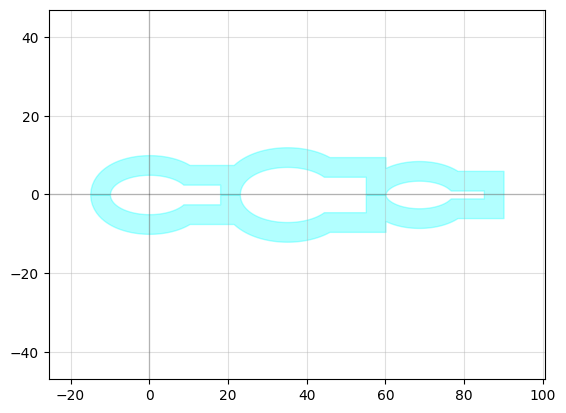

outline_64f21a00: uid bcd5cd14, ports [], references [], 1 polygons

In [34]:
# Outline the geometry and open a hole at each port
gf.geometry.outline(offsets, distance=5, open_ports=False, layer=(2, 0))  # No holes

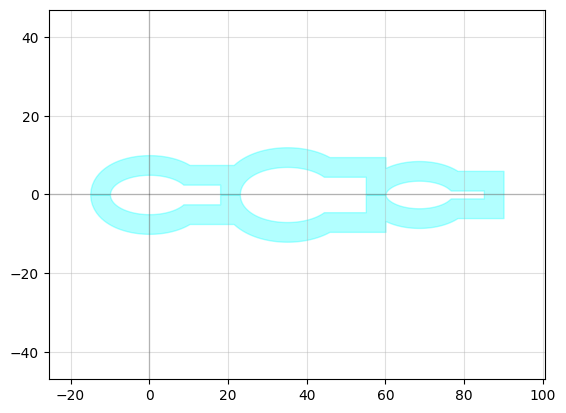

outline_b31c56f0: uid 90cccc61, ports [], references [], 1 polygons

In [35]:
gf.geometry.outline(
    offsets, distance=5, open_ports=True, layer=(2, 0)
)  # Hole is the same width as the port

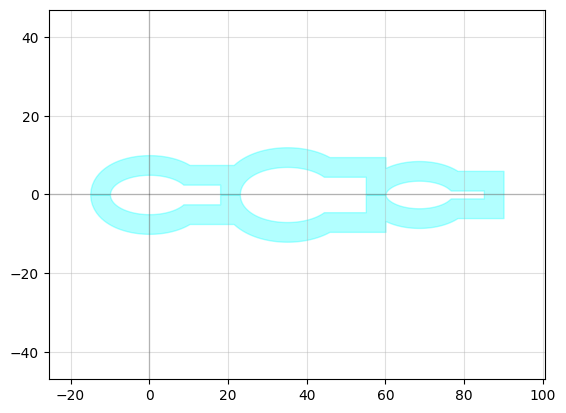

outline_db60ee80: uid cfb474f3, ports [], references [], 1 polygons

In [36]:
gf.geometry.outline(
    offsets, distance=5, open_ports=10, layer=(2, 0)
)  # Change the hole size by entering a float

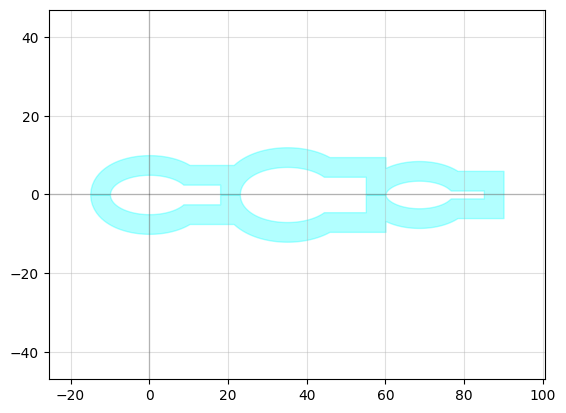

outline_26f23f18: uid ab9b4d50, ports [], references [], 1 polygons

In [37]:
gf.geometry.outline(
    offsets, distance=5, open_ports=5, layer=(2, 0)
)  # Creates flush opening (open_ports > distance)

### Invert

The ``gf.boolean.invert()`` function creates an inverted version of the input geometry.  The function creates a rectangle around the geometry (with extra padding of distance ``border``), then subtract all polygons from all layers from that rectangle, resulting in an inverted version of the geometry.

Speedup note: The ``num_divisions`` argument can be used to divide up the geometry into multiple rectangular regions and process each region sequentially (which is more computationally efficient).  If you have a large geometry that takes a long time to process, try using ``num_divisions = [10,10]`` to optimize the operation.

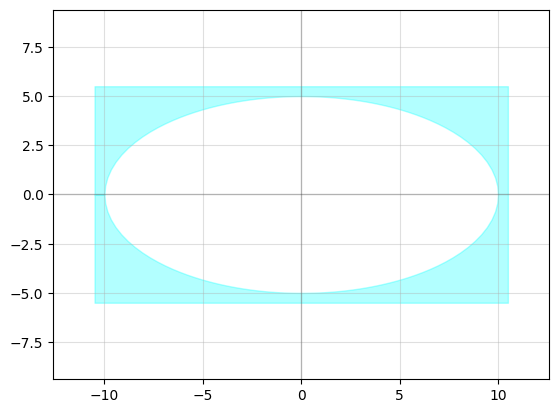

invert_33fa9a87: uid 81b3e24b, ports [], references [], 1 polygons

In [38]:
import gdsfactory as gf

E = gf.components.ellipse(radii=(10, 5))
D = gf.geometry.invert(E, border=0.5, precision=1e-6, layer=(2, 0))
D

### Union

The ``union()`` function is a "join" function, and is functionally identical to the "OR" operation of ``gf.boolean()``.  The one difference is it's able to perform this function layer-wise, so each layer can be individually combined.

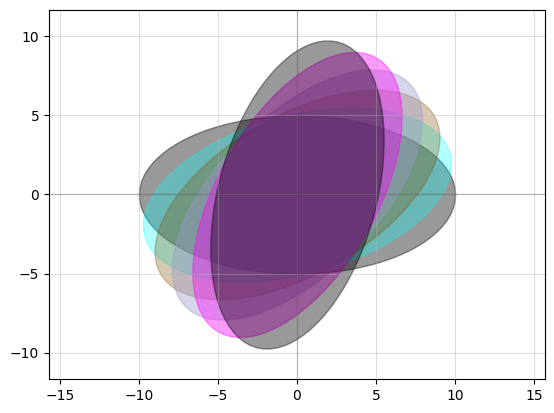

union: uid 6ae9015f, ports [], references ['ellipse_1', 'ellipse_2', 'ellipse_3', 'ellipse_4', 'ellipse_5', 'ellipse_6'], 0 polygons

In [39]:
import gdsfactory as gf

D = gf.Component("union")
e0 = D << gf.components.ellipse(layer=(1, 0))
e1 = D << gf.components.ellipse(layer=(2, 0))
e2 = D << gf.components.ellipse(layer=(3, 0))
e3 = D << gf.components.ellipse(layer=(4, 0))
e4 = D << gf.components.ellipse(layer=(5, 0))
e5 = D << gf.components.ellipse(layer=(6, 0))

e1.rotate(15 * 1)
e2.rotate(15 * 2)
e3.rotate(15 * 3)
e4.rotate(15 * 4)
e5.rotate(15 * 5)

D

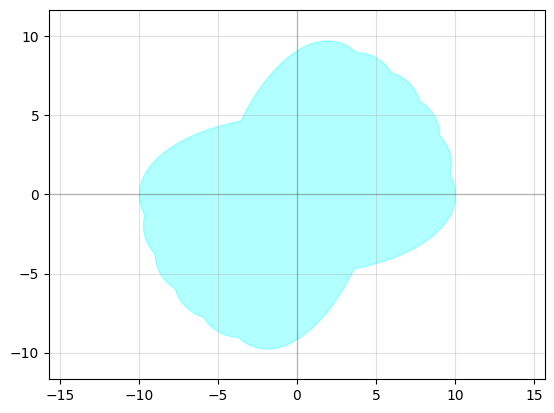

union_c89e9033: uid d81d8510, ports [], references [], 1 polygons

In [40]:
# We have two options to unioning - take all polygons, regardless of
# layer, and join them together (in this case on layer (2,0) like so:
D_joined = gf.geometry.union(D, by_layer=False, layer=(2, 0))
D_joined

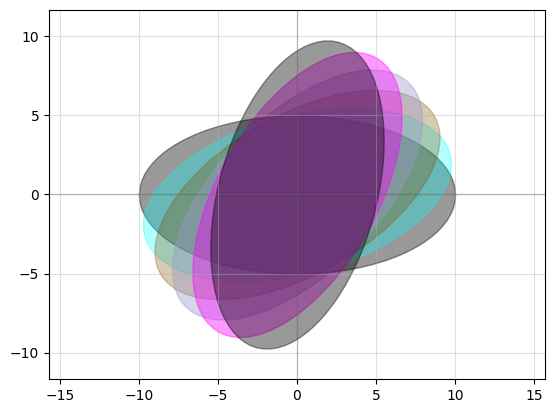

union_40184f65: uid dffa184d, ports [], references [], 6 polygons

In [41]:
# Or we can perform the union operate by-layer
D_joined_by_layer = gf.geometry.union(D, by_layer=True)
D_joined_by_layer

### XOR / diff

The ``xor_diff()`` function can be used to compare two geometries and identify where they are different.  Specifically, it performs a layer-wise XOR operation.  If two geometries are identical, the result will be an empty Component.  If they are not identical, any areas not shared by the two geometries will remain.

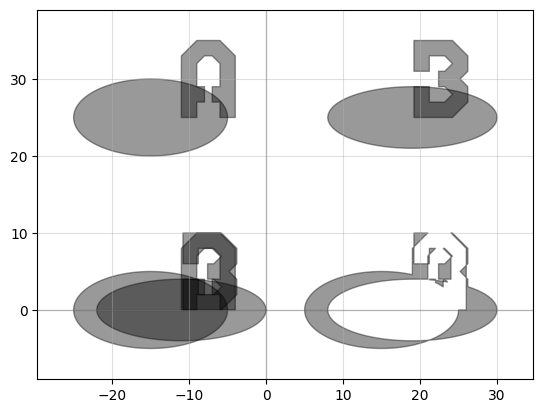

xor_diff: uid 4e0498b2, ports [], references ['A_1', 'B_1', 'A_2', 'B_2', 'xor_diff_1'], 0 polygons

In [42]:
import gdsfactory as gf

A = gf.Component("A")
A.add_ref(gf.components.ellipse(radii=[10, 5], layer=(1, 0)))
A.add_ref(gf.components.text("A")).move([3, 0])

B = gf.Component("B")
B.add_ref(gf.components.ellipse(radii=[11, 4], layer=(1, 0))).movex(4)
B.add_ref(gf.components.text("B")).move([3.2, 0])
X = gf.geometry.xor_diff(A=A, B=B, precision=1e-6)

# Plot the original geometry and the result
# Upper left: A / Upper right: B
# Lower left: A and B / Lower right: A xor B "diff" comparison
D = gf.Component("xor_diff")
D.add_ref(A).move([-15, 25])
D.add_ref(B).move([15, 25])
D.add_ref(A).movex(-15)
D.add_ref(B).movex(-15)
D.add_ref(X).movex(15)
D

## Trim

`trim` returns the portion of that component within that domain preserving all layers and (possibly) ports.

It's like the opposite of "add_padding", and also allows non-rectangular shapes for the padding removal.

Useful when resizing an existing component for simulations

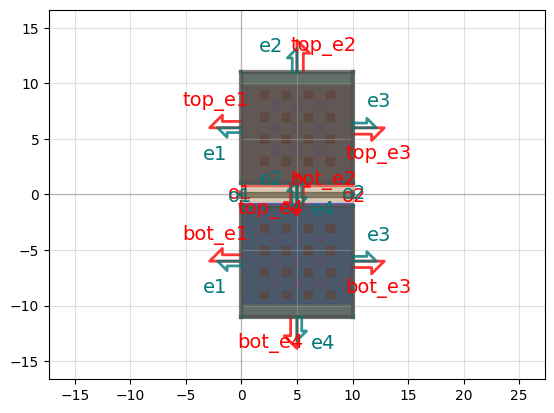

straight_pin_length10_taperNone: uid 373af8d2, ports ['o1', 'o2', 'bot_e1', 'bot_e2', 'bot_e3', 'bot_e4', 'top_e1', 'top_e2', 'top_e3', 'top_e4'], references ['straight_1', 'via_stack_1', 'via_stack_2'], 0 polygons

In [43]:
c = gf.components.straight_pin(length=10, taper=None)
c

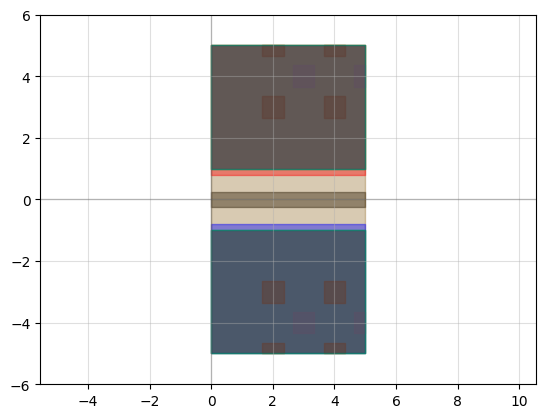

trim_1429b547: uid aa7cf4ce, ports [], references [], 32 polygons

In [44]:
trimmed_c = gf.geometry.trim(component=c, domain=[[0, -5], [0, 5], [5, 5], [5, -5]])
trimmed_c

## Lithography structures

### Step-resolution

The `gf.components.litho_steps()` function creates lithographic test structure that is useful for measuring resolution of photoresist or electron-beam resists.  It provides both positive-tone and negative-tone resolution tests.

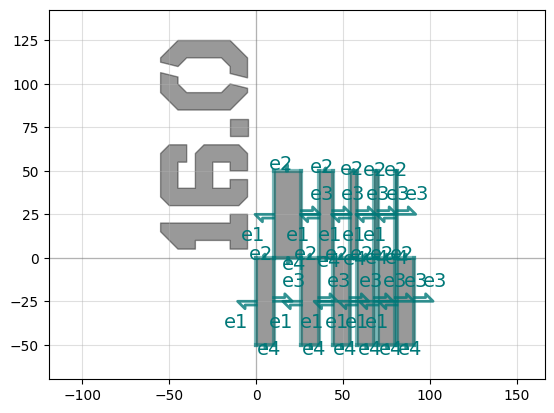

litho_steps_af496947: uid d008f655, ports [], references ['text_1', 'rectangle_1', 'rectangle_2', 'rectangle_3', 'rectangle_4', 'rectangle_5', 'rectangle_6', 'rectangle_7', 'rectangle_8', 'rectangle_9', 'rectangle_10', 'rectangle_11'], 0 polygons

In [45]:
D = gf.components.litho_steps(
    line_widths=[1, 2, 4, 8, 16], line_spacing=10, height=100, layer=(1, 0)
)
D

### Calipers (inter-layer alignment)

The `gf.components.litho_calipers()` function is used to detect offsets in multilayer fabrication.  It creates a two sets of notches on different layers.  When an fabrication error/offset occurs, it is easy to detect how much the offset is because both center-notches are no longer aligned.

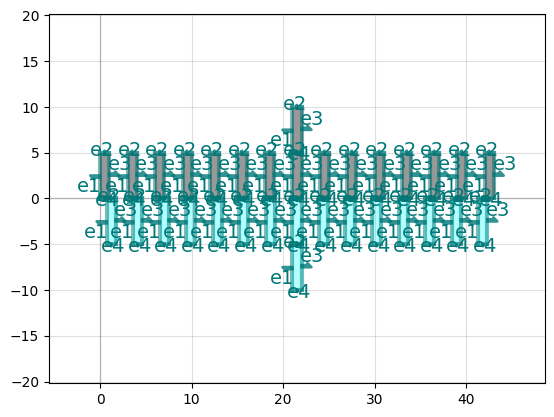

litho_calipers_4f052b1e: uid ebc2d939, ports [], references ['rectangle_1', 'rectangle_2', 'rectangle_3', 'rectangle_4', 'rectangle_5', 'rectangle_6', 'rectangle_7', 'rectangle_8', 'rectangle_9', 'rectangle_10', 'rectangle_11', 'rectangle_12', 'rectangle_13', 'rectangle_14', 'rectangle_15', 'rectangle_16', 'rectangle_17', 'rectangle_18', 'rectangle_19', 'rectangle_20', 'rectangle_21', 'rectangle_22', 'rectangle_23', 'rectangle_24', 'rectangle_25', 'rectangle_26', 'rectangle_27', 'rectangle_28', 'rectangle_29', 'rectangle_30', 'rectangle_31', 'rectangle_32'], 0 polygons

In [46]:
D = gf.components.litho_calipers(
    notch_size=[1, 5],
    notch_spacing=2,
    num_notches=7,
    offset_per_notch=0.1,
    row_spacing=0,
    layer1=(1, 0),
    layer2=(2, 0),
)
D

## Paths

See **Path tutorial** for more details -- this is just an enumeration of the available built-in Path functions

### Circular arc

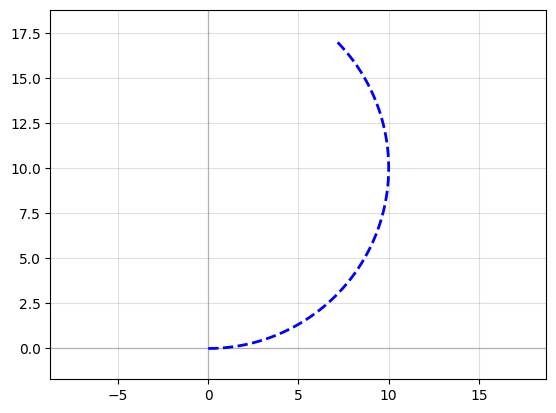

In [47]:
P = gf.path.arc(radius=10, angle=135, npoints=720)
f = P.plot()

### Straight

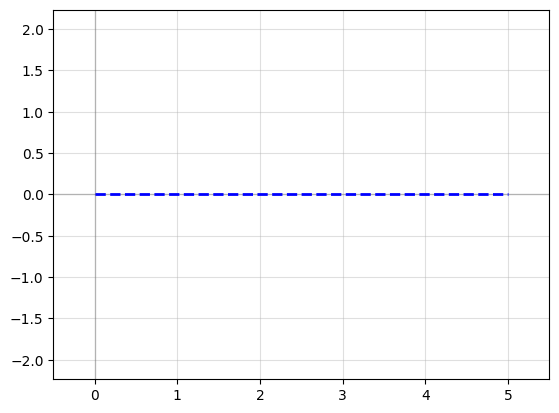

In [48]:
import gdsfactory as gf

P = gf.path.straight(length=5, npoints=100)
f = P.plot()

### Euler curve

Also known as a straight-to-bend, clothoid, racetrack, or track transition, this Path tapers adiabatically from straight to curved.  Often used to minimize losses in photonic straights.  If `p < 1.0`, will create a "partial euler" curve as described in Vogelbacher et. al. https://dx.doi.org/10.1364/oe.27.031394.  If the `use_eff` argument is false, `radius` corresponds to minimum radius of curvature of the bend.  If `use_eff`  is true, `radius` corresponds to the "effective" radius of the bend-- The curve will be scaled such that the endpoints match an arc with parameters `radius` and `angle`.

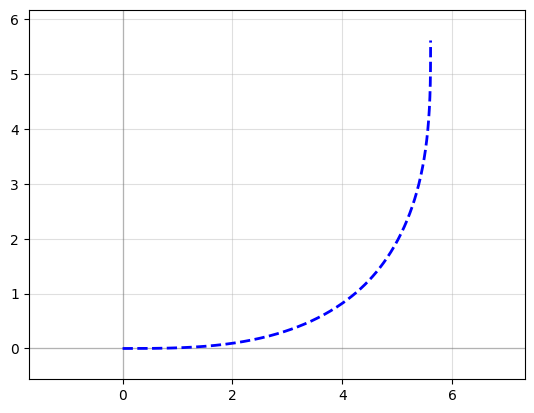

In [49]:
P = gf.path.euler(radius=3, angle=90, p=1.0, use_eff=False, npoints=720)
f = P.plot()

### Smooth path from waypoints

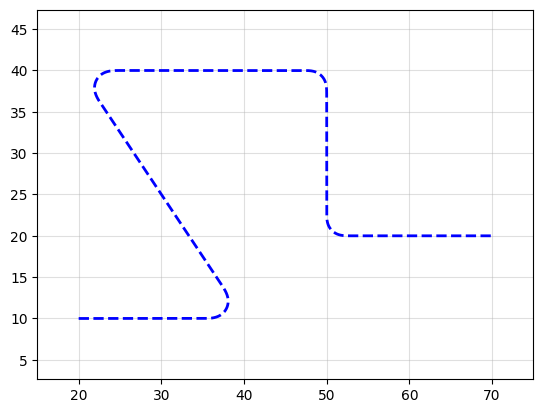

In [50]:
import numpy as np
import gdsfactory as gf

points = np.array([(20, 10), (40, 10), (20, 40), (50, 40), (50, 20), (70, 20)])

P = gf.path.smooth(
    points=points,
    radius=2,
    bend=gf.path.euler,
    use_eff=False,
)
f = P.plot()

### Delay spiral

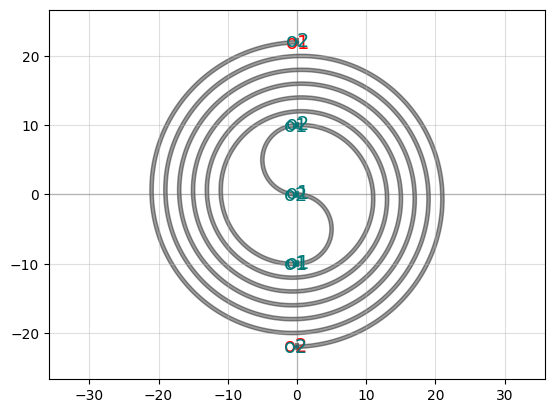

spiral_double: uid 9ae858d6, ports ['o1', 'o2'], references ['bend_circular_1', 'bend_circular_2', 'extrude_1', 'extrude_2'], 0 polygons

In [51]:
c = gf.components.spiral_double()
c

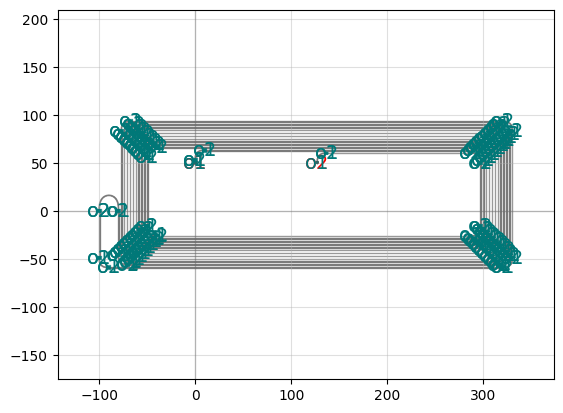

spiral_inner_io: uid feb4ca00, ports ['o1', 'o2'], references ['bend_euler_1', 'bend_euler_2', 'bend_euler_3', 'bend_euler_4', 'bend_euler_5', 'bend_euler_6', 'bend_euler_7', 'bend_euler_8', 'bend_euler_9', 'bend_euler_10', 'bend_euler_11', 'bend_euler_12', 'bend_euler_13', 'bend_euler_14', 'bend_euler_15', 'bend_euler_16', 'bend_euler_17', 'bend_euler_18', 'bend_euler_19', 'bend_euler_20', 'bend_euler_21', 'bend_euler_22', 'bend_euler_23', 'bend_euler_24', 'straight_1', 'straight_2', 'straight_3', 'straight_4', 'straight_5', 'straight_6', 'straight_7', 'straight_8', 'straight_9', 'straight_10', 'straight_11', 'straight_12', 'straight_13', 'straight_14', 'straight_15', 'straight_16', 'straight_17', 'straight_18', 'straight_19', 'straight_20', 'straight_21', 'straight_22', 'straight_23', 'straight_24', 'straight_25', 'bend_euler_25', 'bend_euler_26', 'bend_euler_27', 'bend_euler_28', 'bend_euler_29', 'bend_euler_30', 'bend_euler_31', 'bend_euler_32', 'bend_euler_33', 'bend_euler_34', 'bend_euler_35', 'bend_euler_36', 'bend_euler_37', 'bend_euler_38', 'bend_euler_39', 'bend_euler_40', 'bend_euler_41', 'bend_euler_42', 'bend_euler_43', 'bend_euler_44', 'bend_euler_45', 'bend_euler_46', 'bend_euler_47', 'bend_euler_48', 'bend_euler_49', 'straight_26', 'straight_27', 'straight_28', 'straight_29', 'straight_30', 'straight_31', 'straight_32', 'straight_33', 'straight_34', 'straight_35', 'straight_36', 'straight_37', 'straight_38', 'straight_39', 'straight_40', 'straight_41', 'straight_42', 'straight_43', 'straight_44', 'straight_45', 'straight_46', 'straight_47', 'straight_48', 'straight_49'], 0 polygons

In [52]:
c = gf.components.spiral_inner_io()
c

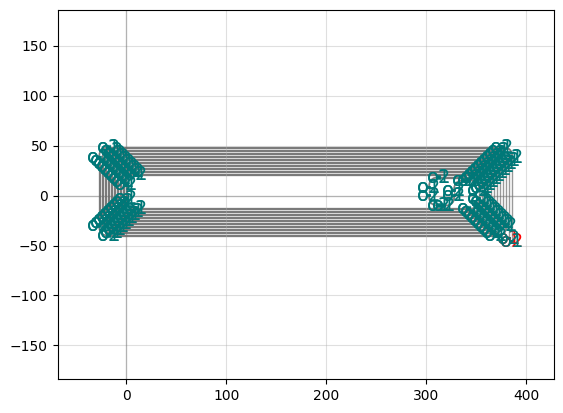

spiral_external_io: uid 74bb105f, ports ['o2', 'o1'], references ['bend_euler_1', 'bend_euler_2', 'bend_euler_3', 'bend_euler_4', 'bend_euler_5', 'bend_euler_6', 'bend_euler_7', 'bend_euler_8', 'bend_euler_9', 'bend_euler_10', 'bend_euler_11', 'bend_euler_12', 'bend_euler_13', 'bend_euler_14', 'bend_euler_15', 'bend_euler_16', 'bend_euler_17', 'bend_euler_18', 'bend_euler_19', 'bend_euler_20', 'bend_euler_21', 'bend_euler_22', 'bend_euler_23', 'bend_euler_24', 'bend_euler_25', 'bend_euler_26', 'bend_euler_27', 'bend_euler_28', 'bend_euler_29', 'bend_euler_30', 'bend_euler_31', 'bend_euler_32', 'bend_euler_33', 'bend_euler_34', 'bend_euler_35', 'bend_euler_36', 'bend_euler_37', 'bend_euler_38', 'bend_euler_39', 'bend_euler_40', 'bend_euler_41', 'bend_euler_42', 'bend_euler_43', 'bend_euler_44', 'bend_euler_45', 'bend_euler_46', 'straight_1', 'straight_2', 'straight_3', 'straight_4', 'straight_5', 'straight_6', 'straight_7', 'straight_8', 'straight_9', 'straight_10', 'straight_11', 'straight_12', 'straight_13', 'straight_14', 'straight_15', 'straight_16', 'straight_17', 'straight_18', 'straight_19', 'straight_20', 'straight_21', 'straight_22', 'straight_23', 'straight_24', 'straight_25', 'straight_26', 'straight_27', 'straight_28', 'straight_29', 'straight_30', 'straight_31', 'straight_32', 'straight_33', 'straight_34', 'straight_35', 'straight_36', 'straight_37', 'straight_38', 'straight_39', 'straight_40', 'straight_41', 'straight_42', 'straight_43', 'straight_44', 'straight_45', 'straight_46', 'straight_47'], 0 polygons

In [53]:
c = gf.components.spiral_external_io()
c

## Importing GDS files

`gf.import_gds()` allows you to easily import external GDSII files.  It imports a single cell from the external GDS file and converts it into a gdsfactory component.

2023-01-22 16:10:56.047 | INFO     | gdsfactory.component:_write_library:1538 - Wrote to 'myoutput.gds'


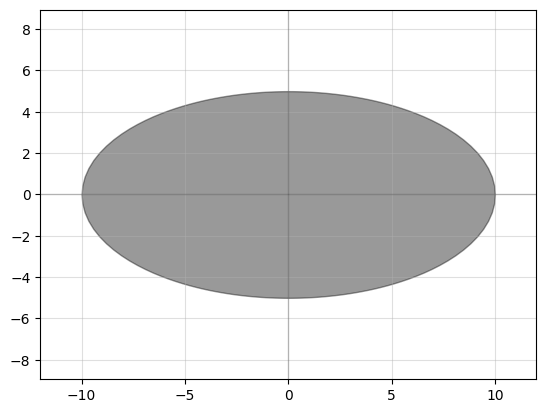

ellipse: uid 693b65ef, ports [], references [], 1 polygons

In [54]:
D = gf.components.ellipse()
D.write_gds("myoutput.gds")
D2 = gf.import_gds(gdspath="myoutput.gds", cellname=None, flatten=False)
D2

## LayerViews

The `LayerViews` class allows you to predefine a collection of layers and specify their properties including: gds layer/datatype, name, and color.  It also comes with a handy preview function called `LayerViews.preview_layerset()`

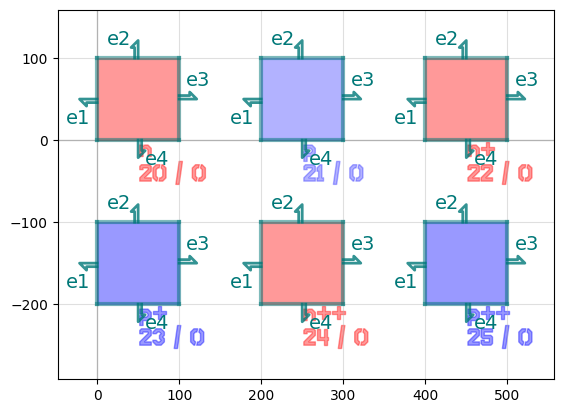

layerset_03ddabff: uid 03ddabff, ports [], references ['rectangle_1', 'text_1', 'rectangle_2', 'text_2', 'rectangle_3', 'text_3', 'rectangle_4', 'text_4', 'rectangle_5', 'text_5', 'rectangle_6', 'text_6'], 0 polygons

In [55]:
import gdsfactory as gf

lys = gf.technology.LayerViews()
lys.add_layer_view("p", color="lightblue", gds_layer=21, gds_datatype=0)
lys.add_layer_view("p+", color="blue", gds_layer=23, gds_datatype=0)
lys.add_layer_view("p++", color="darkblue", gds_layer=25, gds_datatype=0)
lys.add_layer_view("n", color="lightgreen", gds_layer=20, gds_datatype=0)
lys.add_layer_view("n+", color="green", gds_layer=22, gds_datatype=0)
lys.add_layer_view("n++", color="darkgreen", gds_layer=24, gds_datatype=0)
D = lys.preview_layerset(size=100, spacing=100)
D

## Useful contact pads / connectors

These functions are common shapes with ports, often used to make contact pads

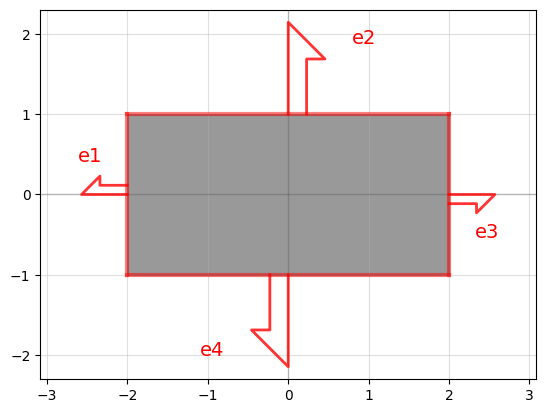

compass_layer1__0_size4__2: uid 13c851c0, ports ['e1', 'e2', 'e3', 'e4'], references [], 1 polygons

In [56]:
c = gf.components.compass(size=(4, 2), layer=(1, 0))
c

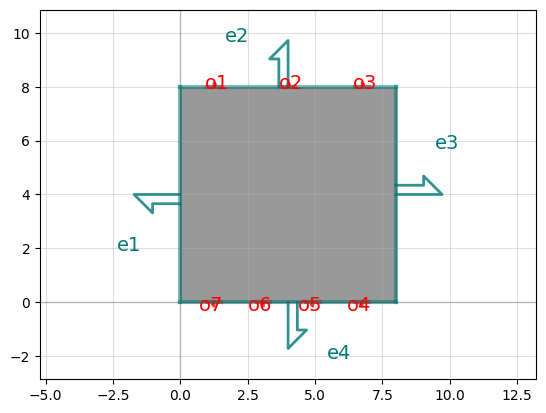

nxn_025a5d93: uid cf423bff, ports ['o1', 'o2', 'o3', 'o7', 'o6', 'o5', 'o4'], references ['rectangle_1'], 0 polygons

In [57]:
c = gf.components.nxn(north=3, south=4, east=0, west=0)
c

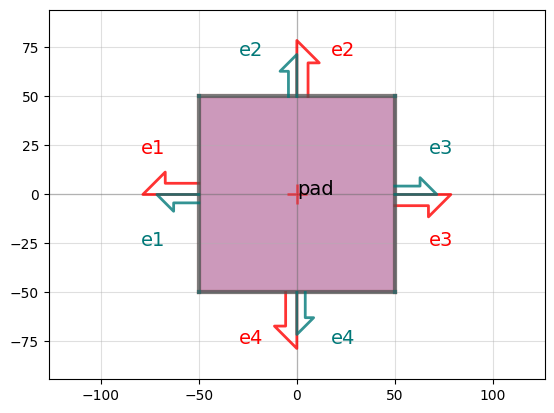

pad: uid 5f06cbb5, ports ['e1', 'e2', 'e3', 'e4', 'pad'], references ['compass_1'], 0 polygons

In [58]:
c = gf.components.pad()
c

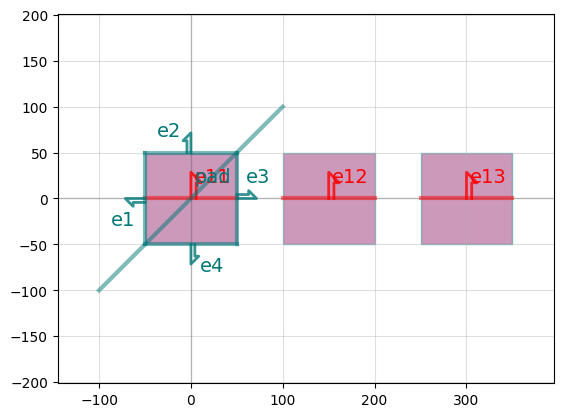

pad_array_columns3_orientation90: uid e17454eb, ports ['e11', 'e12', 'e13'], references ['pad_1'], 0 polygons

In [59]:
c = gf.components.pad_array90(columns=3)
c

## Chip / die template

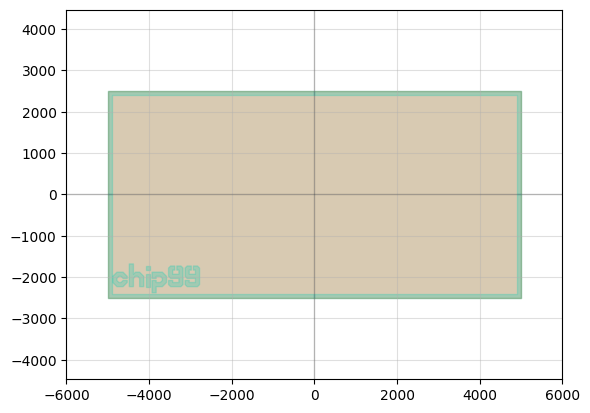

die_83021bd5: uid bb183e1f, ports [], references ['text_1'], 5 polygons

In [60]:
import gdsfactory as gf

D = gf.components.die(
    size=(10000, 5000),  # Size of die
    street_width=100,  # Width of corner marks for die-sawing
    street_length=1000,  # Length of corner marks for die-sawing
    die_name="chip99",  # Label text
    text_size=500,  # Label text size
    text_location="SW",  # Label text compass location e.g. 'S', 'SE', 'SW'
    layer=(2, 0),
    bbox_layer=(3, 0),
)
D

## Optimal superconducting curves

The following structures are meant to reduce "current crowding" in superconducting thin-film structures (such as superconducting nanowires).
They are the result of conformal mapping equations derived in  Clem, J. & Berggren, K. "[Geometry-dependent critical currents in superconducting nanocircuits." Phys. Rev. B 84, 1–27 (2011).](http://dx.doi.org/10.1103/PhysRevB.84.174510)

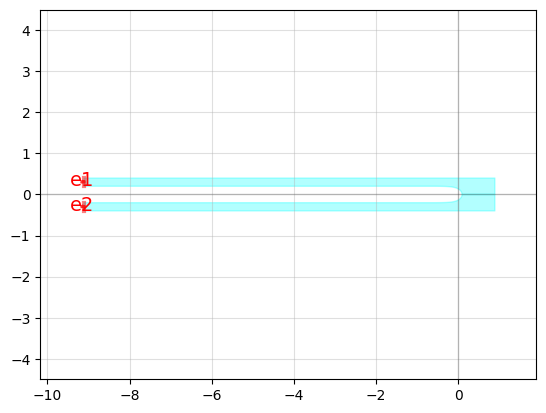

optimal_hairpin_layer2__0: uid c2663928, ports ['e1', 'e2'], references [], 2 polygons

In [61]:
import gdsfactory as gf

c = gf.components.optimal_hairpin(
    width=0.2, pitch=0.6, length=10, turn_ratio=4, num_pts=50, layer=(2, 0)
)
c

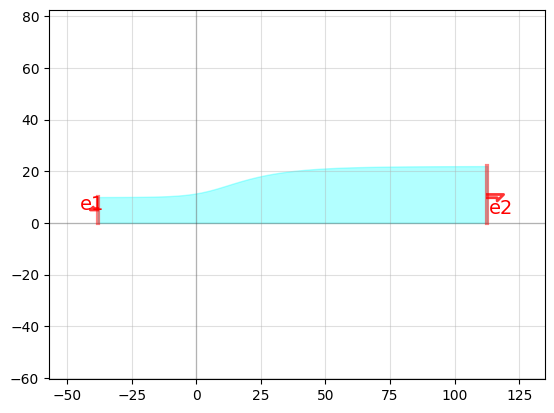

optimal_step_layer2__0: uid 547257fd, ports ['e1', 'e2'], references [], 1 polygons

In [62]:
c = gf.c.optimal_step(
    start_width=10,
    end_width=22,
    num_pts=50,
    width_tol=1e-3,
    anticrowding_factor=1.2,
    symmetric=False,
    layer=(2, 0),
)
c

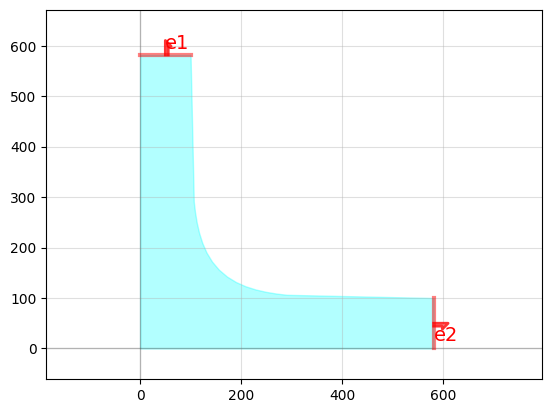

optimal_90deg_layer2__0_d598162d: uid 9bbb2f89, ports ['e1', 'e2'], references [], 1 polygons

In [63]:
c = gf.c.optimal_90deg(width=100.0, num_pts=15, length_adjust=1, layer=(2, 0))
c

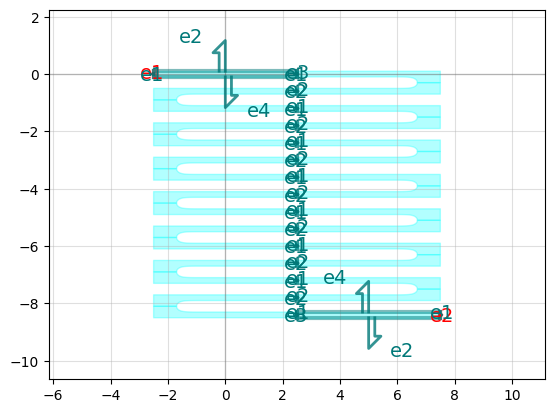

snspd_layer2__0: uid a0464b89, ports ['e1', 'e2'], references ['compass_1', 'optimal_hairpin_1', 'optimal_hairpin_2', 'optimal_hairpin_3', 'optimal_hairpin_4', 'optimal_hairpin_5', 'optimal_hairpin_6', 'optimal_hairpin_7', 'optimal_hairpin_8', 'optimal_hairpin_9', 'optimal_hairpin_10', 'optimal_hairpin_11', 'optimal_hairpin_12', 'optimal_hairpin_13', 'optimal_hairpin_14', 'compass_2'], 0 polygons

In [64]:
c = gf.c.snspd(
    wire_width=0.2,
    wire_pitch=0.6,
    size=(10, 8),
    num_squares=None,
    turn_ratio=4,
    terminals_same_side=False,
    layer=(2, 0),
)
c

## Copying and extracting geometry

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1522: UserWarning: Component 'Unnamed_fe91c59c' contains 1 Unnamed cells
  warnings.warn(


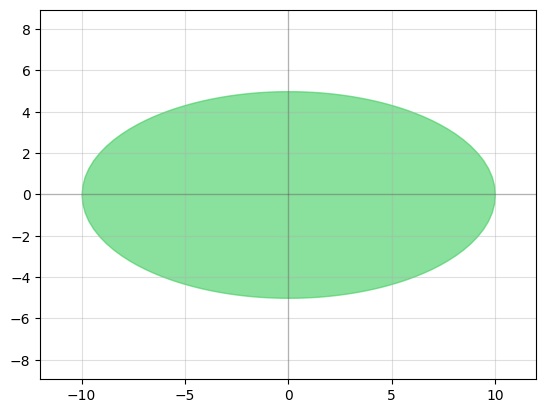

Unnamed_fe91c59c: uid fe91c59c, ports [], references [], 1 polygons

In [65]:
E = gf.Component()
E.add_ref(gf.components.ellipse(layer=(1, 0)))
D = E.extract(layers=[(1, 0)])
D

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1522: UserWarning: Component 'Unnamed_5352be6f' contains 1 Unnamed cells
  warnings.warn(


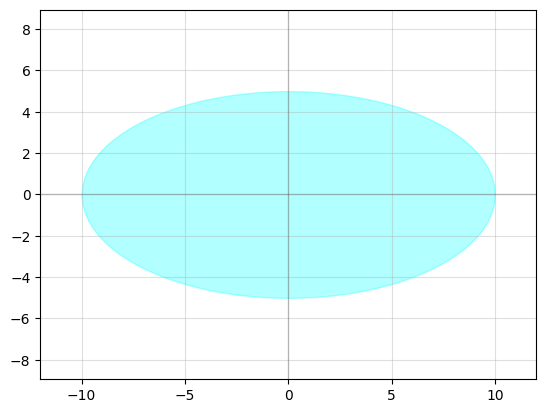

Unnamed_5352be6f: uid 5352be6f, ports [], references [], 1 polygons

In [66]:
import gdsfactory as gf

X = gf.components.ellipse(layer=(2, 0))
c = X.copy()
c

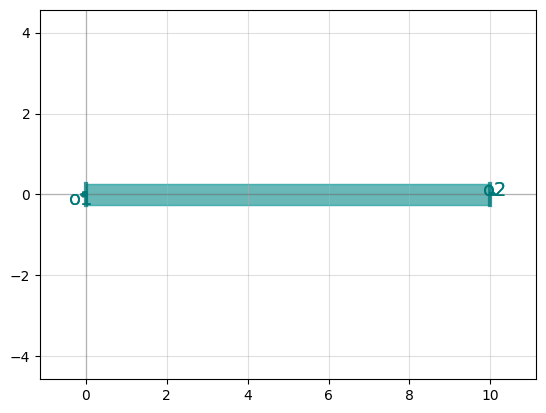

straight_layer2__0_copy_1a14b6fe: uid 375e656c, ports [], references ['straight_1', 'straight_2'], 0 polygons

In [67]:
gf.components.copy_layers(gf.components.straight, layers=((1, 0), (2, 0)))

## Dummy Fill / Tiling

To keep constant density in some layers you can add dummy fill rectangles.

In [68]:
coupler_lengths = [10, 20, 30, 40, 50, 60, 70, 80]
coupler_gaps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
delta_lengths = [10, 100, 200, 300, 400, 500, 500]

mzi = gf.components.mzi_lattice(
    coupler_lengths=coupler_lengths,
    coupler_gaps=coupler_gaps,
    delta_lengths=delta_lengths,
)

# Add fill
c = gf.Component("component_with_fill")
layers = [(1, 0)]
fill_size = [0.5, 0.5]

c << gf.fill_rectangle(
    mzi,
    fill_size=fill_size,
    fill_layers=layers,
    margin=5,
    fill_densities=[0.8] * len(layers),
    avoid_layers=layers,
)

c << mzi
c.show(show_ports=True)